In [1]:
# Install PuLP if needed
!pip install pulp

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 640.0 kB/s eta 0:00:26
   ---------------------------------------- 0.0/16.4 MB 640.0 kB/s eta 0:00:26
   ---------------------------------------- 0.0/16.4 MB 640.0 kB/s eta 0:00:26
   ---------------------------------------- 0.0/16.4 MB 640.0 kB/s eta 0:00:26
   ---------------------------------------- 0.0/16.4 MB 151.3 kB/s eta 0:01:48
   ---------------------------------------- 0.0/16.4 MB 151.3 kB/s eta 0:01:48
   ---------------------------------------- 0.0/16.4 MB 151.3 kB/s eta 0:01:48
   ---------------------------------------- 0.0/16.4 MB 151.3 kB/s eta 0:01:48
   ---------------------------------------- 0.1/16.4 MB 109.2 kB/s eta 0:02:30
   ---------------------------------------- 0.1/16.4 MB 109.2 kB/s eta 0:02:30


In [3]:
from pulp import *

# Initialize the problem
prob = LpProblem("Furniture_Production", LpMaximize)

# Define decision variables
chairs = LpVariable("Chairs", 0, 150, LpInteger)  # min 0, max 150
tables = LpVariable("Tables", 0, 50, LpInteger)   # min 0, max 50

# Define objective function (maximize profit)
prob += 20 * chairs + 50 * tables, "Total Profit"

# Add constraints
prob += 2 * chairs + 5 * tables <= 400, "Labor Constraint"
prob += 1 * chairs + 3 * tables <= 600, "Material Constraint"

# Solve the problem
prob.solve()

# Display results
print(f"Status: {LpStatus[prob.status]}")
print(f"Optimal Production:")
print(f"Chairs: {chairs.varValue} units")
print(f"Tables: {tables.varValue} units")
print(f"Total Profit: ${value(prob.objective)}")

# Calculate resource utilization
print("\nResource Utilization:")
print(f"Labor Used: {2*chairs.varValue + 5*tables.varValue} of 400 hours")
print(f"Material Used: {1*chairs.varValue + 3*tables.varValue} of 600 kg")

Status: Optimal
Optimal Production:
Chairs: 75.0 units
Tables: 50.0 units
Total Profit: $4000.0

Resource Utilization:
Labor Used: 400.0 of 400 hours
Material Used: 225.0 of 600 kg


In [5]:
# Print sensitivity information
print("\nSensitivity Analysis:")
print("Objective Coefficient Ranges:")
for v in prob.variables():
    print(f"{v.name}: ${v.dj} (reduced cost)")

print("\nConstraint Shadow Prices:")
for name, c in prob.constraints.items():
    print(f"{name}: {c.pi} (shadow price)")


Sensitivity Analysis:
Objective Coefficient Ranges:
Chairs: $20.0 (reduced cost)
Tables: $50.0 (reduced cost)

Constraint Shadow Prices:
Labor_Constraint: -0.0 (shadow price)
Material_Constraint: -0.0 (shadow price)


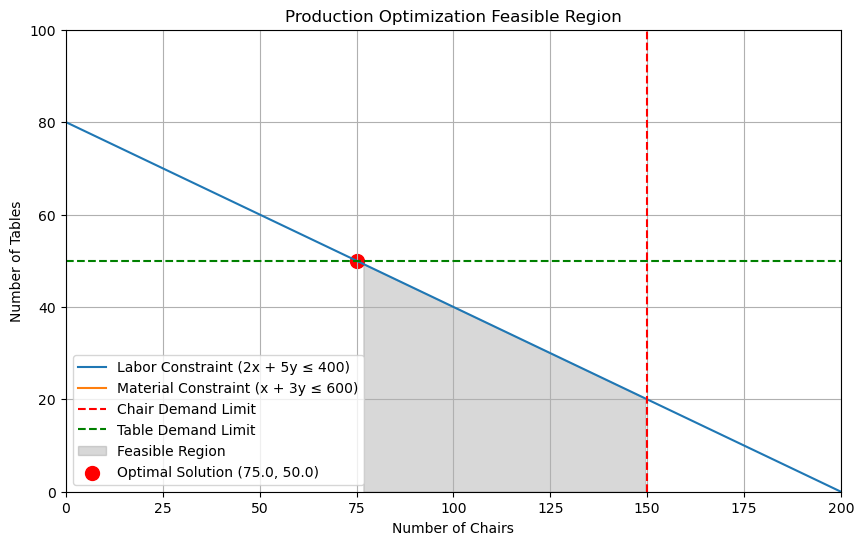

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the feasible region
x = np.linspace(0, 200, 100)
y1 = (400 - 2*x)/5  # Labor constraint
y2 = (600 - x)/3     # Material constraint

plt.figure(figsize=(10,6))
plt.plot(x, y1, label='Labor Constraint (2x + 5y ≤ 400)')
plt.plot(x, y2, label='Material Constraint (x + 3y ≤ 600)')
plt.axvline(x=150, color='r', linestyle='--', label='Chair Demand Limit')
plt.axhline(y=50, color='g', linestyle='--', label='Table Demand Limit')

# Highlight feasible region
plt.fill_between(x, np.minimum(y1, y2), 0, where=(x<=150) & (np.minimum(y1,y2)<=50), 
                 color='gray', alpha=0.3, label='Feasible Region')

# Mark optimal solution
plt.scatter([chairs.varValue], [tables.varValue], color='red', s=100, 
            label=f'Optimal Solution ({chairs.varValue}, {tables.varValue})')

plt.xlabel('Number of Chairs')
plt.ylabel('Number of Tables')
plt.title('Production Optimization Feasible Region')
plt.legend()
plt.grid(True)
plt.xlim(0, 200)
plt.ylim(0, 100)
plt.show()